In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading the dataset
file_path =  'C:/Users/abdul/Downloads/datasets/Electric_Vehicle_Population_Data.csv'
df  = pd.read_csv(file_path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


## Data Cleaning:
Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and errors in a dataset to improve its quality and usability.

In [7]:
#checking for missing values
missing_values = df.isnull().sum()
missing_values

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

In [9]:
#checking for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [11]:
#checking data types of the columns
data_types = df.dtypes
data_types

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [15]:
#fill missing values in 'Postal Code' and 'Legislative District' with a placeholder (-1) before conversion
df['Postal Code'].fillna(-1, inplace=True)
df['Legislative District'].fillna(-1, inplace=True)

In [16]:
#convert 'Postal Code' and 'Legislative District' to integer type
df['Postal Code'] = df['Postal Code'].astype(int)
df['Legislative District'] = df['Legislative District'].astype(int)

In [20]:
#verifying changes
df.dtypes, df.isnull().sum()

(VIN (1-10)                                            object
 County                                                object
 City                                                  object
 State                                                 object
 Postal Code                                            int32
 Model Year                                             int64
 Make                                                  object
 Model                                                 object
 Electric Vehicle Type                                 object
 Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
 Electric Range                                         int64
 Base MSRP                                              int64
 Legislative District                                   int32
 DOL Vehicle ID                                         int64
 Vehicle Location                                      object
 Electric Utility                                      object
 2020 Ce

## Univariate Analysis:
Univariate analysis is a statistical method that involves examining and analyzing the characteristics or distribution of a single variable in isolation.

We'll start by analyzing the following columns:
Electric Vehicle Type,
Make,
Model Year,
Electric Range,
Base MSRP.

In [22]:
#style for the plots
sns.set(style = "whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

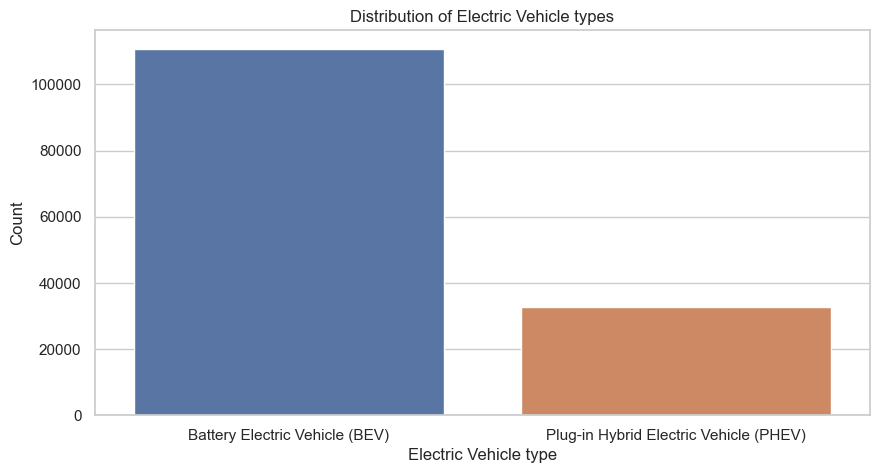

In [44]:
#univariate analysis on Electric Vehicle Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle types')
plt.xlabel('Electric Vehicle type')
plt.ylabel('Count')
plt.show

The bar chart shows the distribution of electric vehicle types in the dataset. It's clear that Battery Electric Vehicles (BEV) are the way more common than Plug-in Hybrid Electric Vehicles (PHEV).

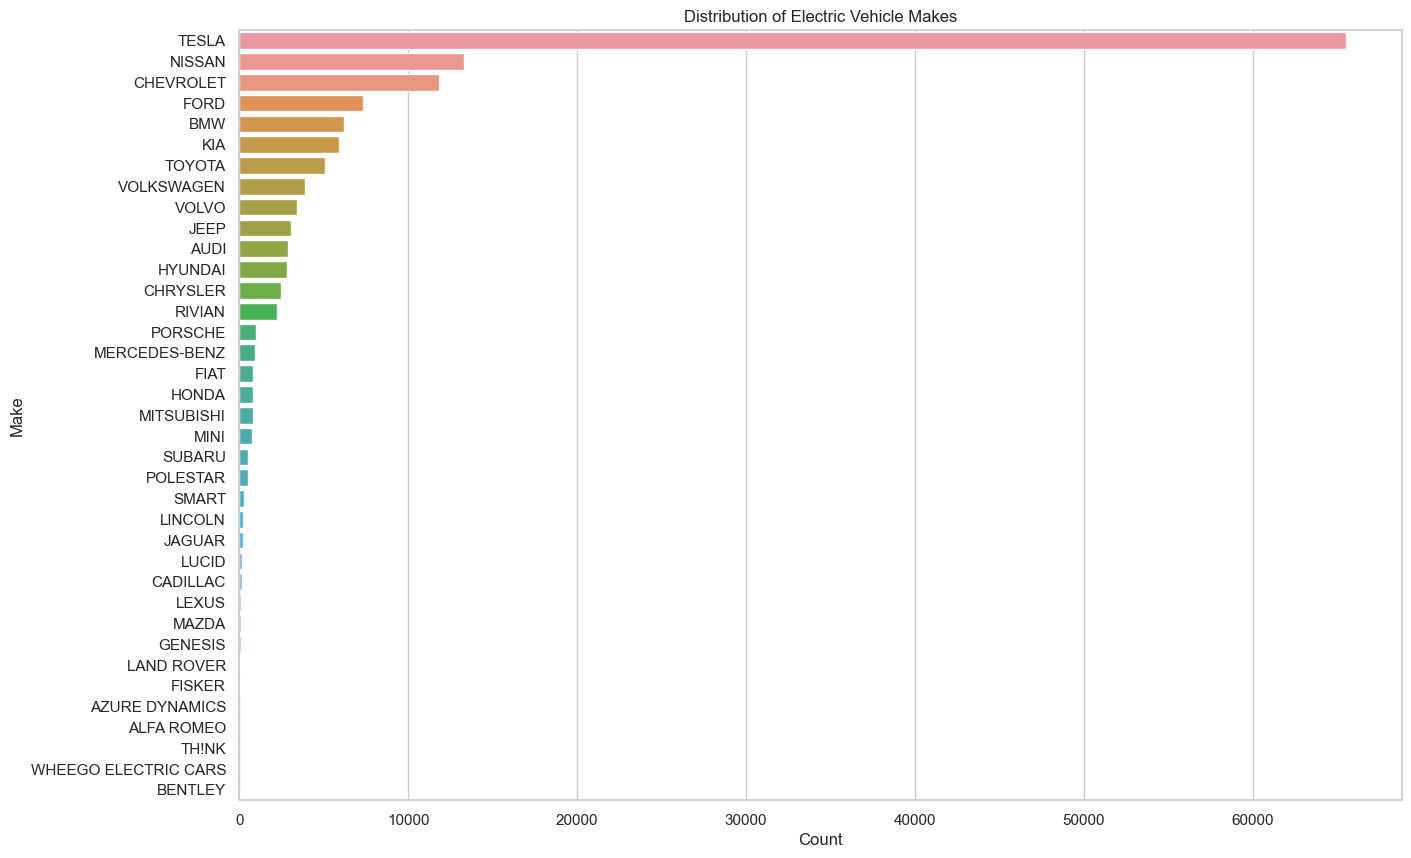

In [41]:
#univariate analysis on Make
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='Make', order = df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

This bar chart shows the distribution of electric vehicle makes. Tesla is the most common make, followed by Nissan, Chevrolet, and BMW.

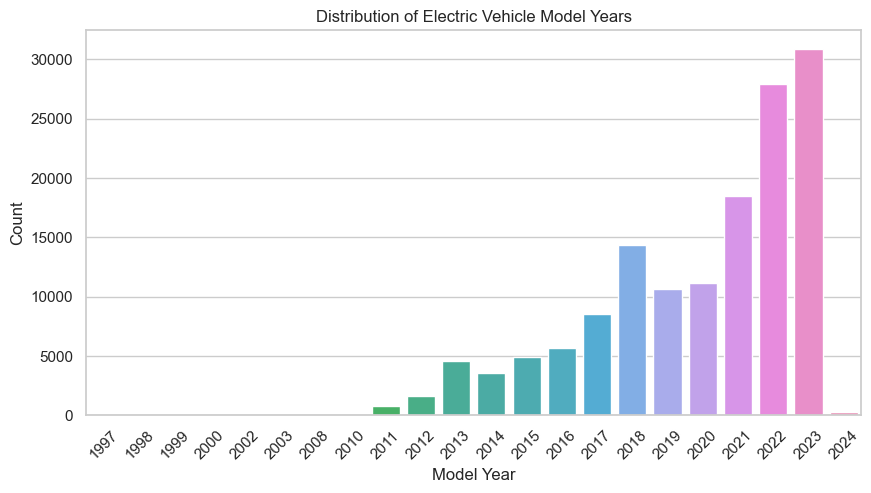

In [36]:
#univariate analysis on Model Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Model Year', order = sorted(df['Model Year'].unique()))
plt.title('Distribution of Electric Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the distribution of electric vehicle model years. We can see that in the recent years, specifically from 2018 onwards, we have a higher number of electric vehicles.

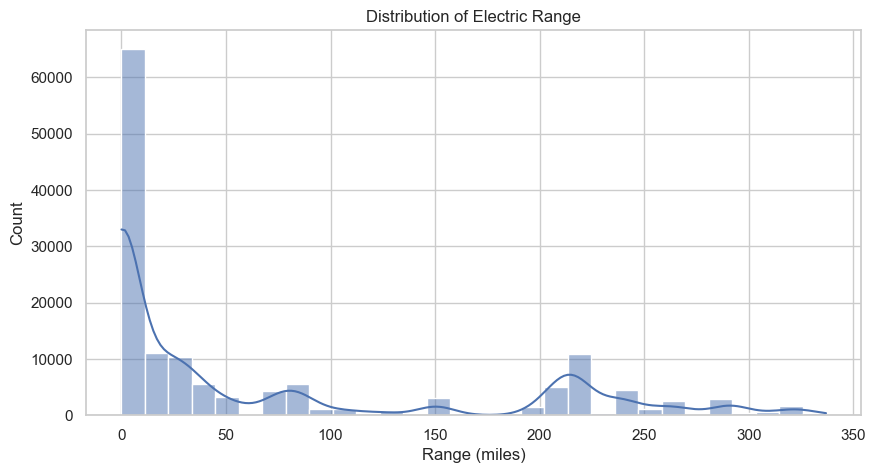

In [47]:
#univariate analysis on Electric Range
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Range (miles)')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of electric ranges for the vehicles in the dataset. Most vehicles have a range of less than 100 miles, but there are also some vehicles with a range of up to 300 miles or more.

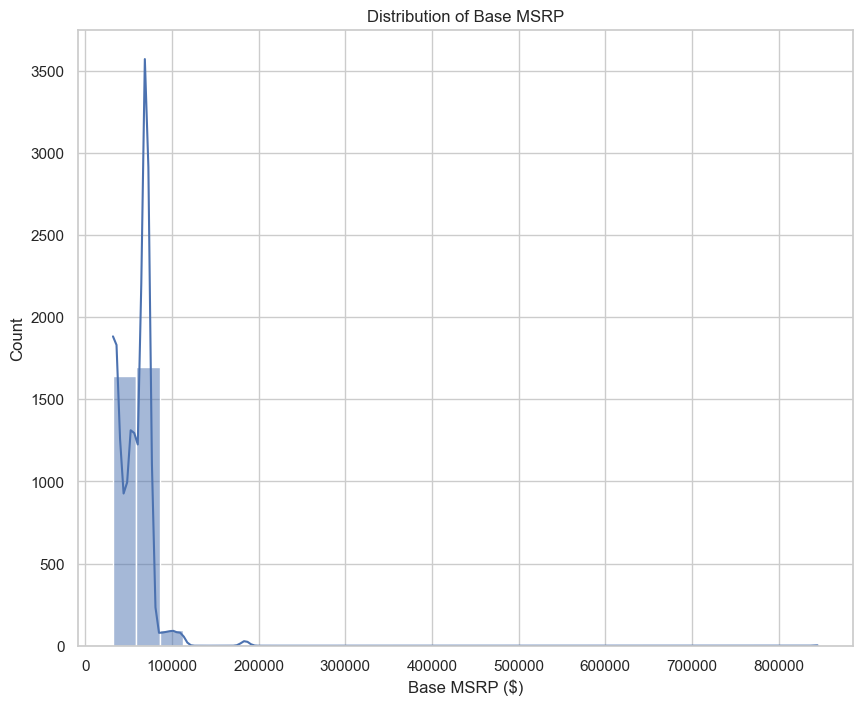

In [52]:
#univariate analysis on Base MSRP
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Base MSRP'] > 0]['Base MSRP'], bins=30, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Count')
plt.show()

This histogram shows the distribution of the Base Manufacturer's Suggested Retail Price (MSRP) for electric vehicles. We've filtered out entries with a 0 MSRP for this analysis. The majority of vehicles have a Base MSRP between 30,000 and 80,000.

## Bivariate analysis:
Bivariate analysis is a statistical technique used to explore and analyze the relationship or interaction between two different variables.

We will focus on:
Relationship between Electric Vehicle Type and Electric Range,
Relationship between Make and Base MSRP,
Relationship between Model Year and Electric Range, and
Relationship between County and Electric Vehicle Type

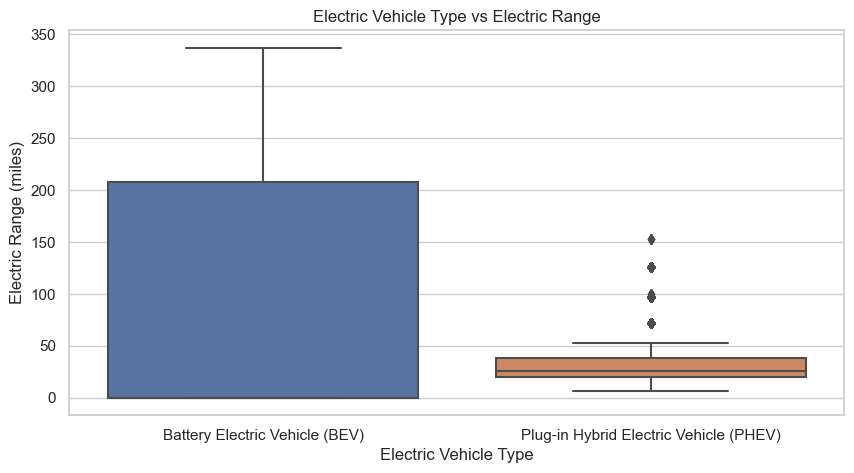

In [60]:
#bivariate analysis on Electric Vehicle Type vs Electric Range
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range', order = df['Electric Vehicle Type'].value_counts().index)
plt.title('Electric Vehicle Type vs Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.show()

The boxplot shows the relationship between the type of electric vehicle and its range. Battery Electric Vehicles (BEV) generally have a higher electric range compared to Plug-in Hybrid Electric Vehicles (PHEV).

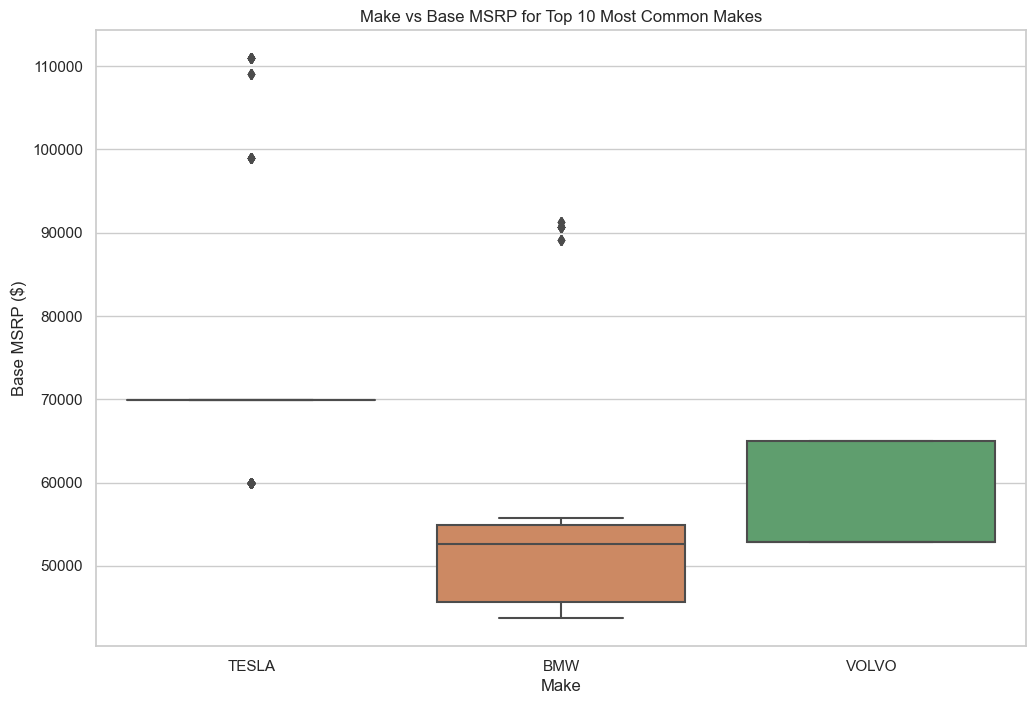

In [83]:
#bivariate analysis on Make vs Base MSRP
top_makes = df['Make'][:10]
top_makes

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['Make'].isin(top_makes) & (df['Base MSRP'] > 0)], x='Make', y='Base MSRP')
plt.title('Make vs Base MSRP for Top 10 Most Common Makes')
plt.xlabel('Make')
plt.ylabel('Base MSRP ($)')
plt.show()

This boxplot shows the relationship between the make of the vehicle and its Base MSRP, focusing on the top 10 most common makes. Tesla vehicles generally have a higher Base MSRP compared to other makes like BMW, and Volvo. The price range for Tesla is also quite broad, indicating a variety of models with different pricing.

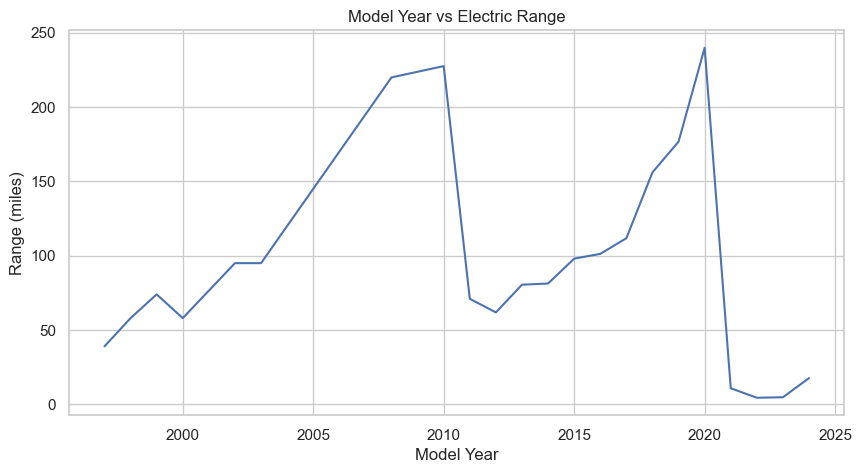

In [84]:
#bivariate analysis on  Model Year vs Electric Range
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Model Year', y='Electric Range', errorbar=None)
plt.title('Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Range (miles)')
plt.show()

The line plot shows the relationship between the model year of the electric vehicles and their range. We can observe that the electric range has increased from the year 2000 to 2020. Then we see a sudden decrease after 2020.

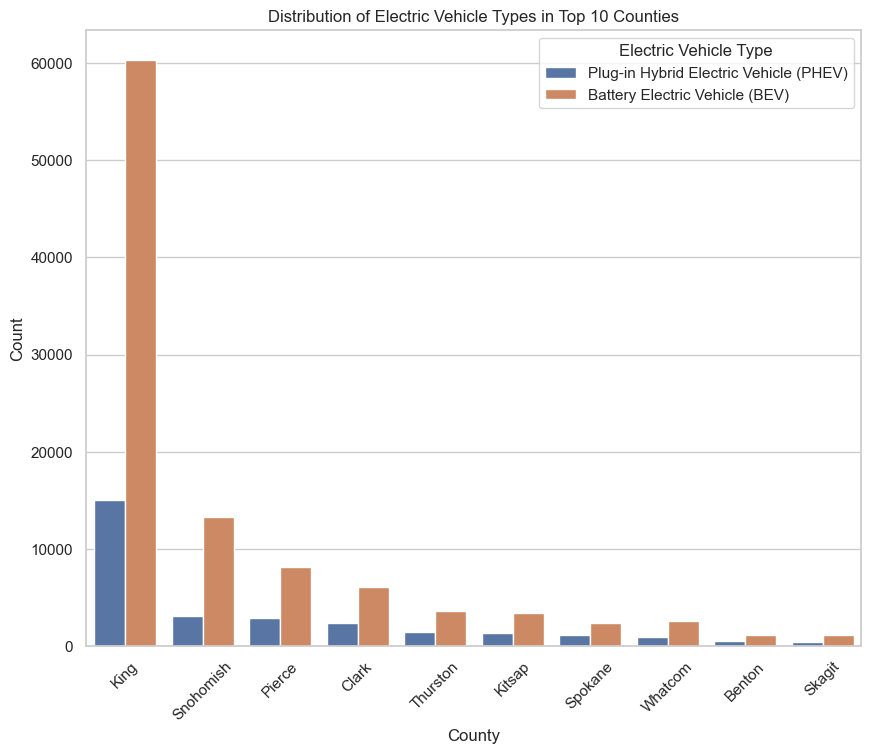

In [85]:
#bivariate analysis on County vs Electric Vehicle Type
top_counties = df['County'].value_counts().index[:10]

plt.figure(figsize=(10, 8))
sns.countplot(data=df[df['County'].isin(top_counties)], x='County', hue='Electric Vehicle Type', order=top_counties)
plt.title('Distribution of Electric Vehicle Types in Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()

The bar chart shows the distribution of electric vehicle types in the top 10 counties in Washington with the most electric vehicles. In almost all counties, Battery Electric Vehicles (BEVs) are more common than Plug-in Hybrid Electric Vehicles (PHEVs). The county of King has the highest number of both BEVs and PHEVs.

# Multivariate analysis:
Multivariate analysis is a statistical approach for analyzing and understanding the relationships and patterns among three or more variables simultaneously.

We can consider doing the following multivariate analyses:

Electric Range vs Base MSRP by Electric Vehicle Type: To see how range and price vary between different types of electric vehicles.

Electric Vehicle Type Distribution by County and Model Year: To explore how the types of electric vehicles in different counties have evolved over time.

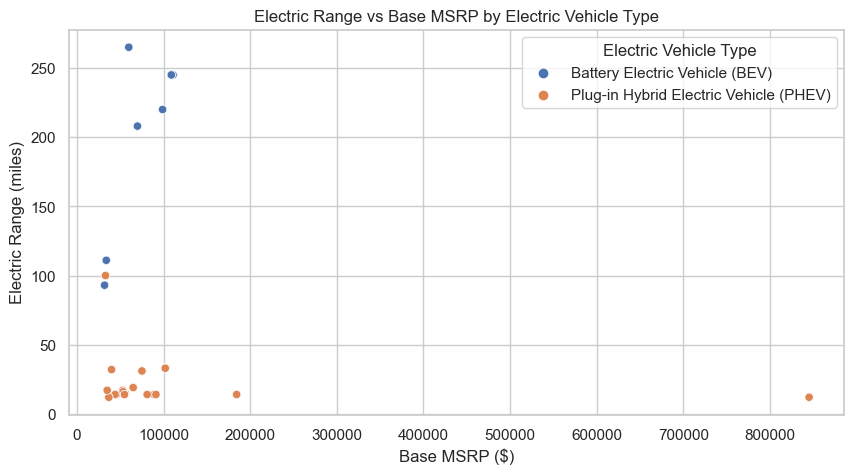

In [87]:
#multivariate analysis on Electric Range vs Base MSRP by Electric Vehicle Type
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['Base MSRP'] > 0], x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type')
plt.title('Electric Range vs Base MSRP by Electric Vehicle Type')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.legend(title='Electric Vehicle Type')
plt.show()

BEVs (Battery Electric Vehicles) generally have a higher range and can also be more expensive.

PHEVs (Plug-in Hybrid Electric Vehicles) tend to have a lower range and are generally less expensive compared to BEVs

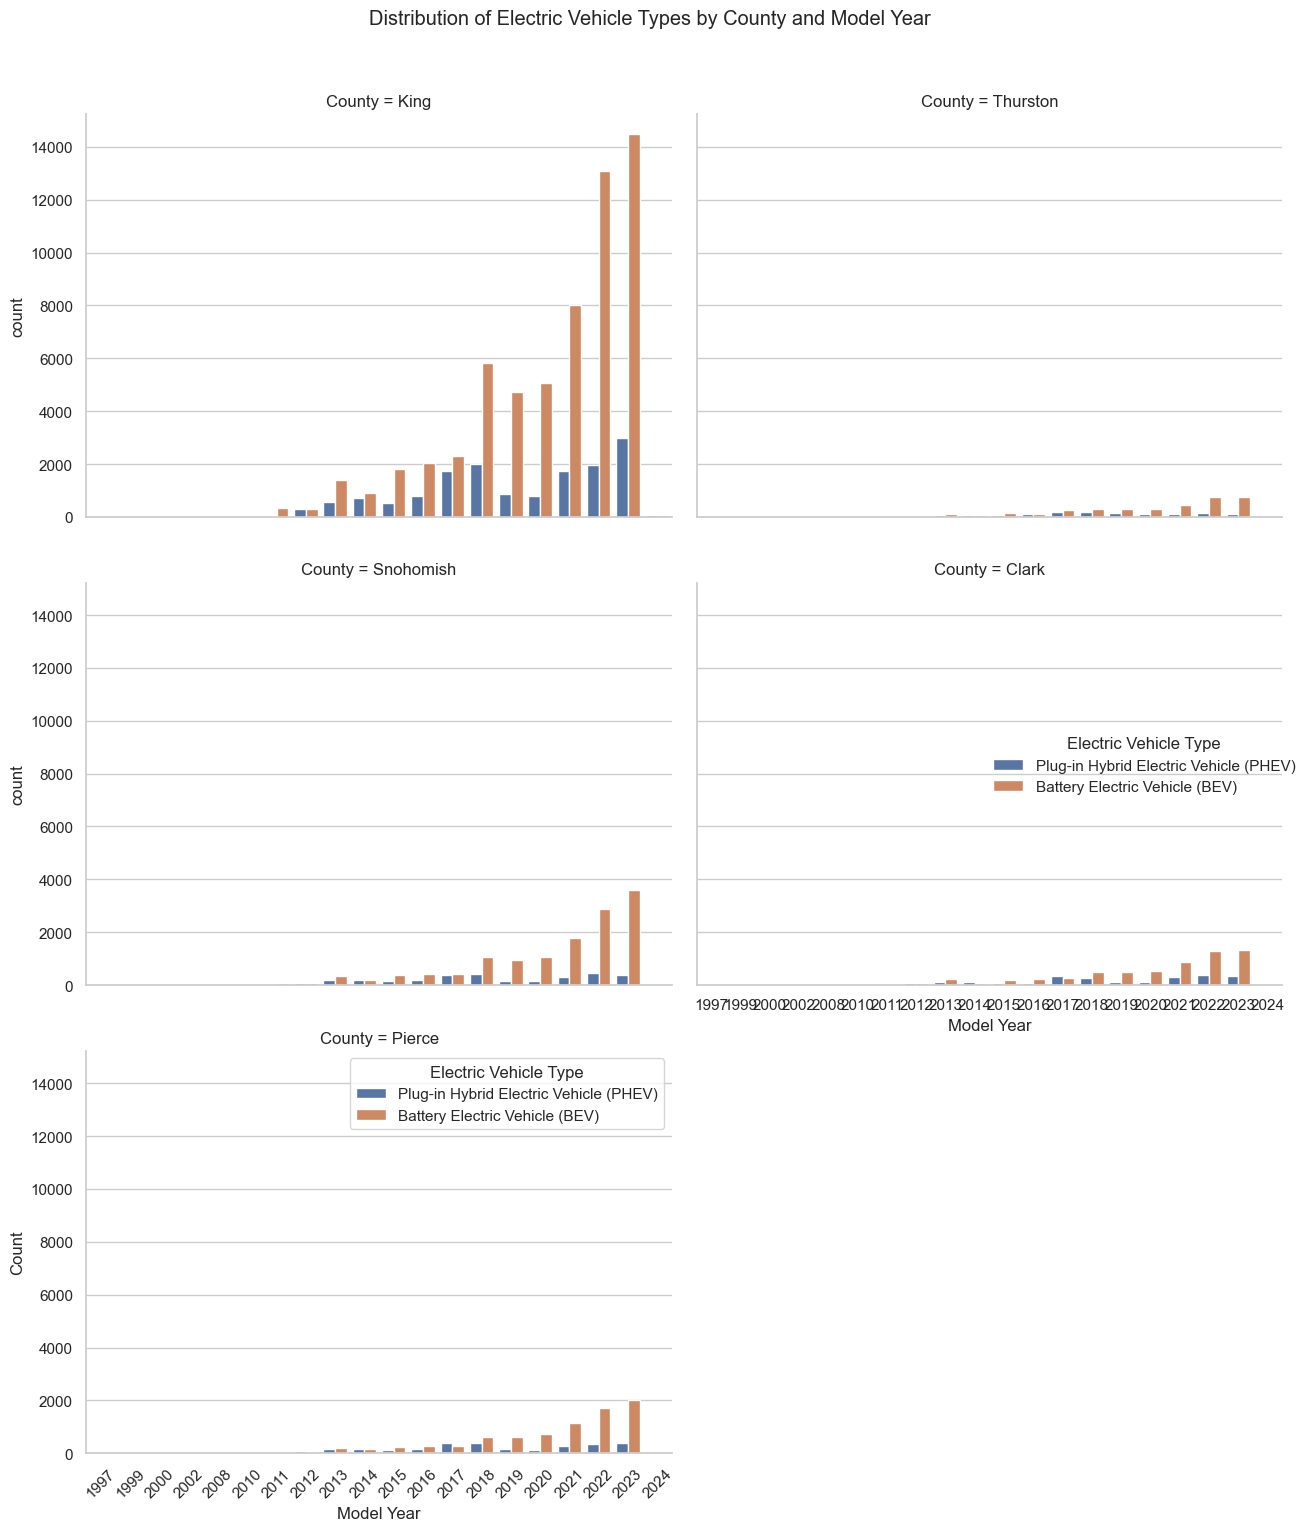

In [100]:
#multivariate analysis on Electric Vehicle Type Distribution by County and Model Year
top_5_counties = df['County'].value_counts().index[:5]

sns.catplot(data=df[df['County'].isin(top_5_counties)], x='Model Year', hue='Electric Vehicle Type', kind='count', 
            col='County', col_wrap=2)
plt.suptitle('Distribution of Electric Vehicle Types by County and Model Year', y=1.02)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

This multi-panel count plot shows the distribution of Electric Vehicle Types (BEV and PHEV) across the top 5 counties by Model Year. A few observations:

King County has the highest number of both BEVs and PHEVs, with BEVs becoming increasingly dominant in recent years.

Snohomish County similar to King County, but with fewer vehicles. BEVs are also becoming more prevalent in recent years.

Pierce County shows a smaller number of electric vehicles, but BEVs are again the dominant type in recent years.

Thurston County has fewer electric vehicles, but BEVs seem to be the more common type.

Whatcom County also has fewer electric vehicles, with BEVs appearing to be more common in recent years.

## Conclusions:
Battery Electric Vehicles (BEVs) are far more common than Plug-in Hybrid Electric Vehicles (PHEVs). This could indicate a preference for fully electric vehicles over hybrids.

Tesla is the most popular make, suggesting that it is a dominant player in the electric vehicle market.

There has been a significant increase in the number of electric vehicles from 2018 onwards, which could reflect growing consumer interest and technological advancements.

Most electric vehicles have a range of less than 100 miles, but newer models and specific makes like Tesla offer ranges up to 300 miles or more.

The majority of electric vehicles are priced between 30,000 and 80,000, with Tesla models generally being on the higher end of the spectrum.

King County has the highest number of electric vehicles, indicating that urban and suburban areas are more likely to adopt electric vehicles.

Over the years, especially after 2010, electric vehicles with higher electric ranges have become more common. This could be due to advancements in battery technology.

BEVs not only dominate in terms of numbers but also offer higher electric ranges and are generally more expensive than PHEVs.
The preference for BEVs over PHEVs is consistent across the top 5 counties and has been strengthening in recent years.